<a href="https://colab.research.google.com/github/shivamm007/Mobile_price_prediction/blob/main/Mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is**

**Data Description -**

Battery_power - Total energy a battery can store in one time measured in mAh
Blue - Has bluetooth or not, Clock_speed - speed at which microprocessor executes instructions, Dual_sim - Has dual sim support or not, Fc - Front Camera mega pixels, Four_g - Has 4G or not, Int_memory - Internal Memory in Gigabytes, M_dep - Mobile Depth in cm, Mobile_wt - Weight of mobile phone, N_cores - Number of cores of processor, Pc - Primary Camera mega pixels, Px_height - Pixel Resolution Height, Px_width - Pixel Resolution Width, Ram - Random Access Memory in Mega, Touch_screen - Has touch screen or not, Wifi - Has wifi or not, Sc_w - Screen Width of mobile in cm, Talk_time - longest time that a single battery charge will last when you are Three_g - Has 3G or not, Wifi - Has wifi or not, Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

**Import Data ,Libraries and Data Preprocessing**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [10]:
MPR_Dataset=pd.read_csv("/content/data_mobile_price_range.csv")

In [11]:
MPR_Dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
MPR_Dataset.tail()
     

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [13]:
MPR_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [14]:
MPR_Dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [15]:

MPR_Dataset.describe()
MPR_Dataset.describe().T
     

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [16]:
MPR_Dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [17]:
len(MPR_Dataset.columns)

21

In [18]:

MPR_Dataset.shape

(2000, 21)

Firstly check the minimum value of pixel width,pixel Hight and Screen ,Width Screen Hight is canot be Zero.

In [19]:
print(len(MPR_Dataset[MPR_Dataset.px_height==0]))
print(len(MPR_Dataset[MPR_Dataset.px_width==0]))
print(len(MPR_Dataset[MPR_Dataset.sc_h==0]))
print(len(MPR_Dataset[MPR_Dataset.sc_w==0]))

2
0
0
180


I can found the zero value in pixle hight and screen width columns. So handle this value assigning mean .



In [20]:
MPR_Dataset['sc_w'][MPR_Dataset[MPR_Dataset.sc_w == 0].index] = MPR_Dataset.sc_w.mean()
MPR_Dataset['px_height'][MPR_Dataset[MPR_Dataset.px_height == 0].index] = MPR_Dataset.px_height.mean()

In [21]:
#Sucsessfully handle this values.

print(len(MPR_Dataset[MPR_Dataset.sc_w==0]))
print(len(MPR_Dataset[MPR_Dataset.px_height==0]))

0
0


In [22]:
MPR_Dataset.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [23]:
#Cheacking null/missing values Present in Dataset Or Not???
MPR_Dataset.isnull().sum()
#There are no missing values in the datasets.

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# **Exploratory Data Analysis**

Firstly Checked correlation between Each Features in dataset.

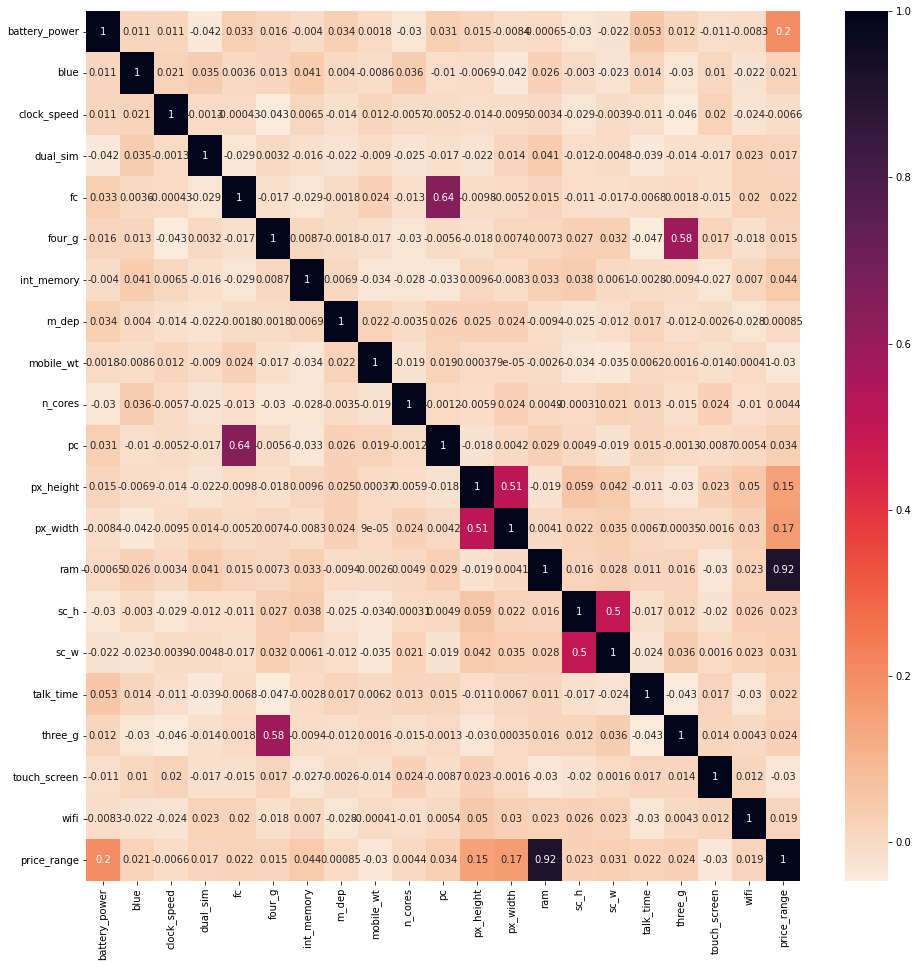

In [24]:
correlation = MPR_Dataset.corr()
plt.figure(figsize = [16, 16])
sns.heatmap(correlation, cmap = 'rocket_r', annot = True)
     



*   we can see that ,this correlation heatmap RAM and price_range shows high
correlation(0.92) which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.
*   front camera megapixels and Primary camera Megapixels are correlated then good chances that if front camera of a phone is good, the back camera would also be good.

*   There is some collinearity in feature pairs px_width', 'px_height.Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen.






**Price**

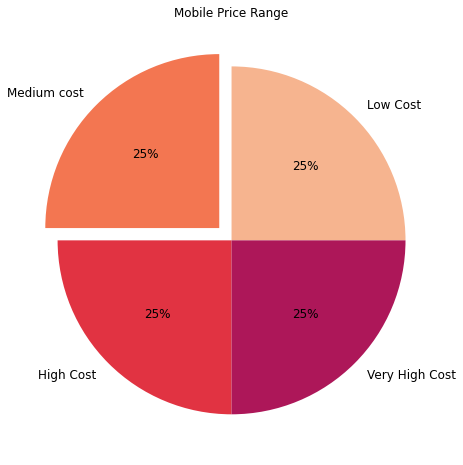

In [25]:

fig = plt.figure(1, figsize=(8,8))
data = [(len(MPR_Dataset[MPR_Dataset.price_range==0])),(len(MPR_Dataset[MPR_Dataset.price_range==1])),(len(MPR_Dataset[MPR_Dataset.price_range==2])),(len(MPR_Dataset[MPR_Dataset.price_range==3])) ]
keys = ['Low Cost', 'Medium cost', 'High Cost', 'Very High Cost']
explode = [0, 0.1, 0, 0]
palette_color =sns.color_palette('rocket_r')[0:4]
plt.pie(data, labels=keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Mobile Price Range')
plt.show()
     



*   There are mobile phones in 4 price ranges. so according this pie chart percentages of all Mobile price range almost similar



**Battery Power**

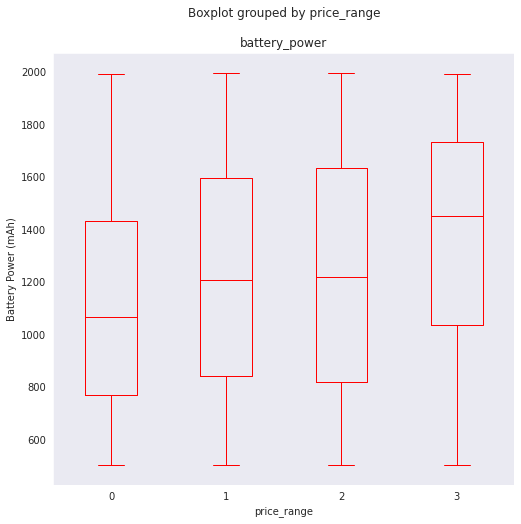

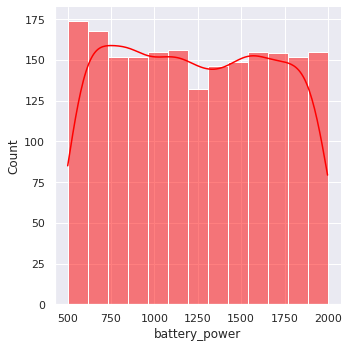

In [26]:
# Checked can Battery Power be affected in mobile Price?? and how the battery mAh is spread

from mmap import MAP_PRIVATE

sns.set_style("darkgrid")
MPR_Dataset.boxplot(by ='price_range', column =['battery_power'], grid = False,figsize=(8,8),color='red'),
plt.ylabel("Battery Power (mAh)")

sns.set(rc={'figure.figsize':(8,8)})
ax=sns.displot(data=MPR_Dataset["battery_power"],kde=True,color='red')

plt.show()




*   So this boxplot shows how the battery mAh is spread. there is a gradual increase as the price range increases



**Bluetooth**

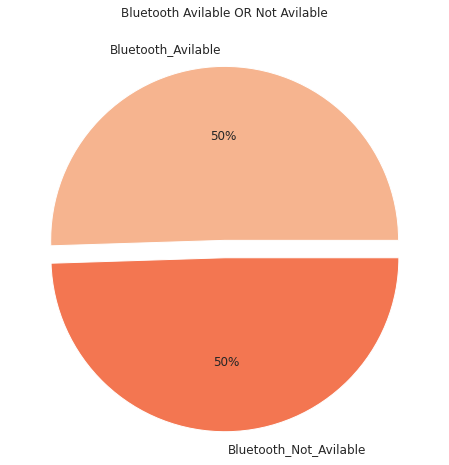

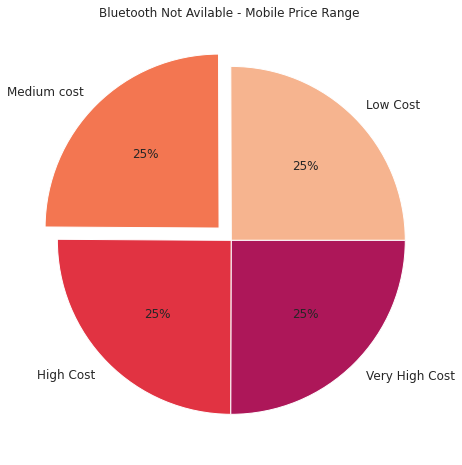

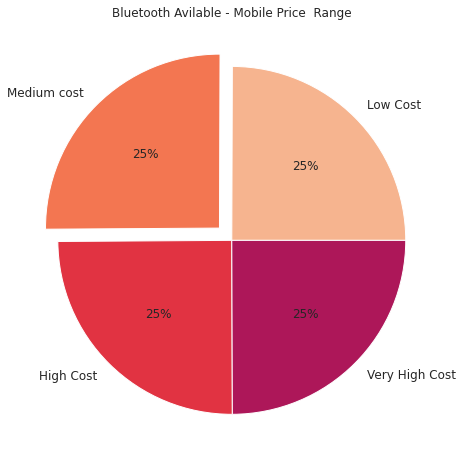

In [27]:
#checked if bluetooth available or not???

fig = plt.figure(1, figsize=(8,8))
blue_data = [(len(MPR_Dataset[MPR_Dataset.blue==0])),(len(MPR_Dataset[MPR_Dataset.blue==1]))]
blue_keys=["Bluetooth_Avilable","Bluetooth_Not_Avilable"]
explode = [0, 0.1]
palette_color =sns.color_palette('rocket_r')
plt.pie(blue_data, labels=blue_keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Bluetooth Avilable OR Not Avilable')
plt.show()



#Analysis can bluetooth are affected on mobile price or not
data1=MPR_Dataset[MPR_Dataset.blue==0]
BlueNotAviLowP=(data1['price_range']==0).sum()
BlueNotAviMedP=(data1['price_range']==1).sum()
BlueNotAviHighP=(data1['price_range']==2).sum()
BlueNotAviVHP=(data1['price_range']==2).sum()

BL_NA_P=[BlueNotAviLowP,BlueNotAviMedP,BlueNotAviHighP,BlueNotAviVHP]

data2=MPR_Dataset[MPR_Dataset.blue==1]
BlueAviLowP=(data2['price_range']==0).sum()
BlueAviMedP=(data2['price_range']==1).sum()
BlueAviHighP=(data2['price_range']==2).sum()
BlueAviVHP=(data2['price_range']==2).sum()

BL_A_P=[BlueAviLowP,BlueAviMedP,BlueAviHighP,BlueAviVHP]

fig = plt.figure(1, figsize=(8,8))
B_DATA= BL_NA_P
explode = [0, 0.1, 0, 0]
palette_color =sns.color_palette('rocket_r')
plt.pie(B_DATA, labels=keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Bluetooth Not Avilable - Mobile Price Range ')
plt.show()

fig = plt.figure(1, figsize=(8,8))
B_DATA1= BL_A_P
explode = [0, 0.1, 0, 0]
palette_color =sns.color_palette('rocket_r')
plt.pie(B_DATA1, labels=keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Bluetooth Avilable - Mobile Price  Range')
plt.show()



*   half the devices have Bluetooth, and half don’t.
*   This Bluetooth features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions



**4G and 3G**

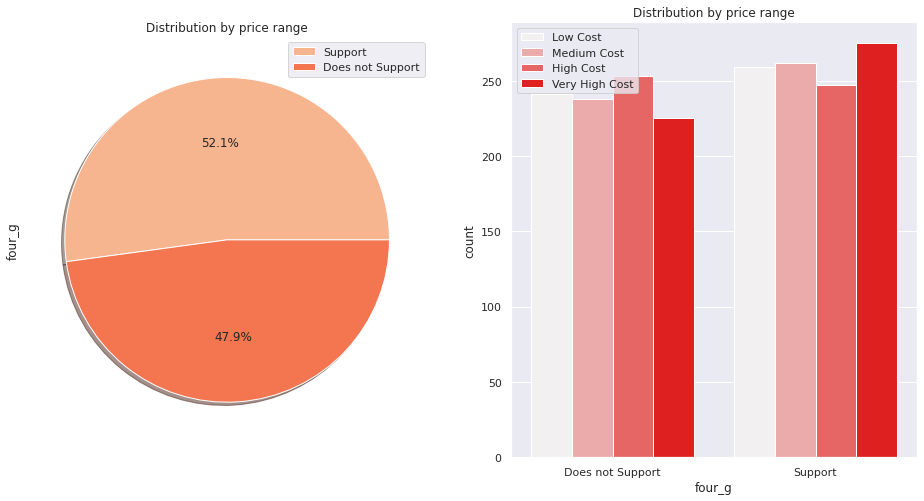

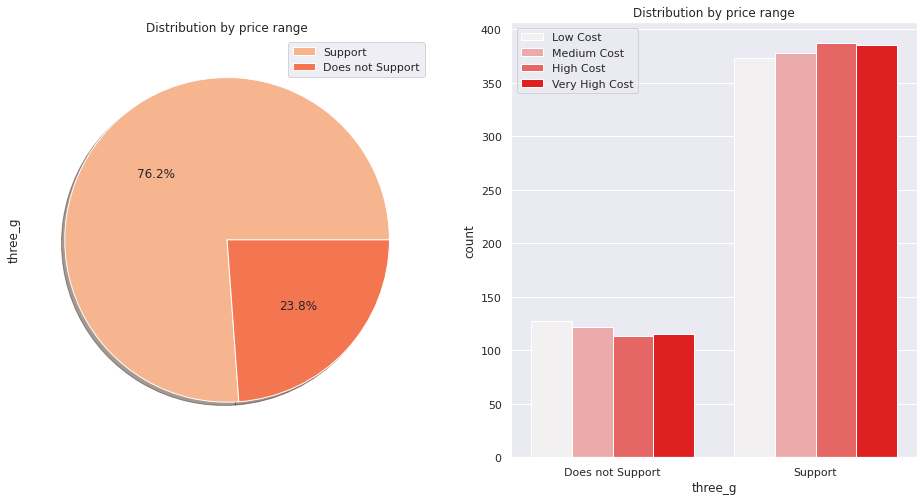

In [28]:
binary_features = [ 'four_g', 'three_g']
for dataset in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16, 8))

  MPR_Dataset[dataset].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1,colors=palette_color, shadow=True,labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = dataset, hue = 'price_range', data = MPR_Dataset, ax = ax2, color = 'red')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(dataset)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])
     

Distribution of price range almost similer of supported and non supported feature in 4G . So that is not usedfull of prediction.

feature 'three_g' play an important feature in prediction

**RAM**

<function matplotlib.pyplot.show(*args, **kw)>

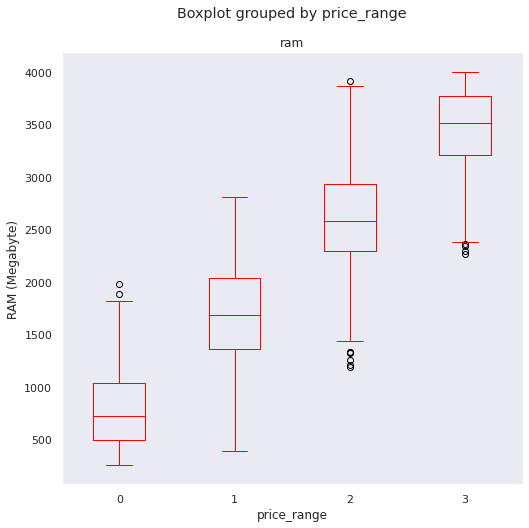

In [29]:
sns.set_style("darkgrid")
MPR_Dataset.boxplot(by ='price_range', column =['ram'], grid = False,color='red'),
plt.ylabel("RAM (Megabyte)")
plt.show


Ram has continuous increase with price range while moving from Low cost to Very high cost

**pixel_width and pixel_Hight**

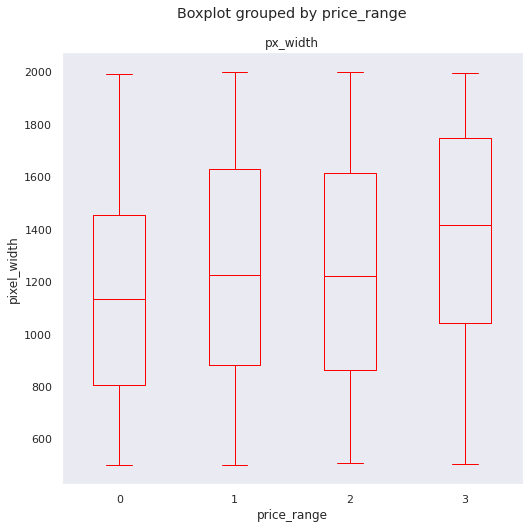

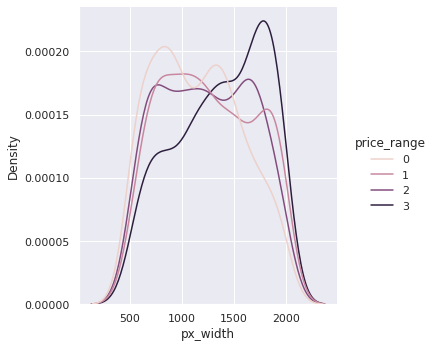

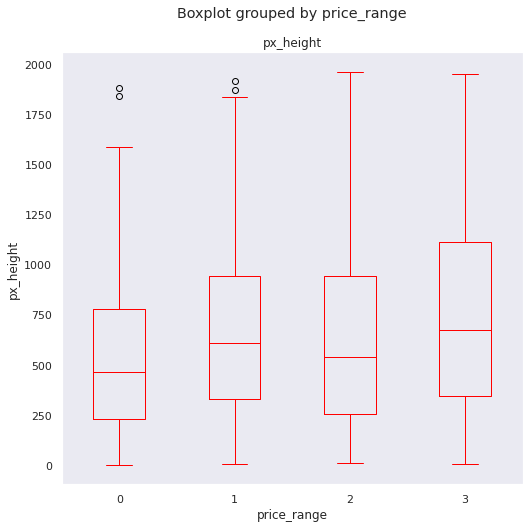

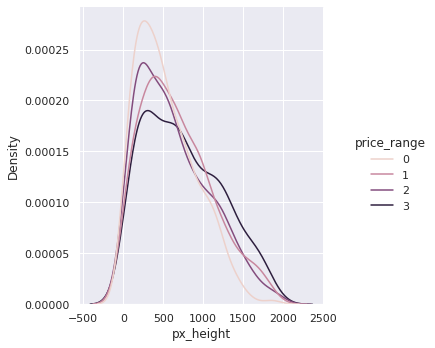

In [30]:
#pixel width

sns.set_style("darkgrid")
MPR_Dataset.boxplot(by ='price_range', column =['px_width'], grid = False,color='red'),
plt.ylabel("pixel_width")

sns.displot(data=MPR_Dataset, x="px_width", hue="price_range", kind="kde")


#pixel Hight
sns.set_style("darkgrid")
MPR_Dataset.boxplot(by ='price_range', column =['px_height'], grid = False,color='red'),
plt.ylabel("px_height")

sns.displot(data=MPR_Dataset, x="px_height", hue="price_range", kind="kde")

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height

**FC (front camera megapixels) and PC (Primary camera Megapixels)**

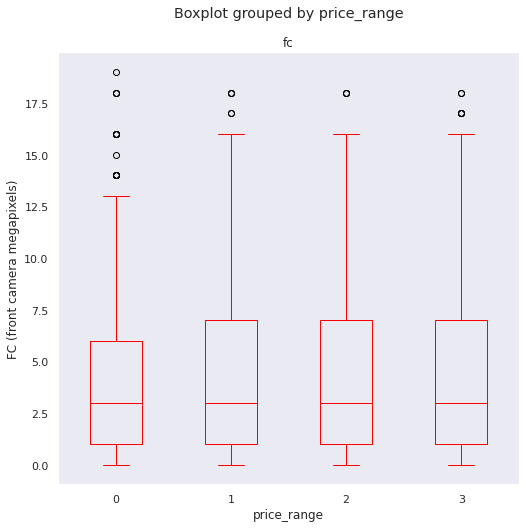

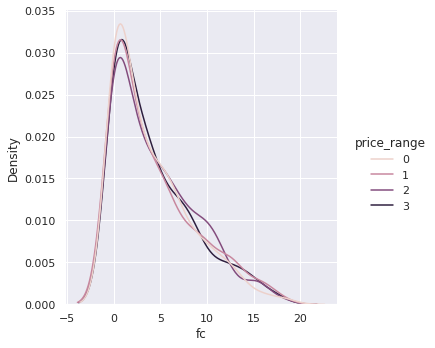

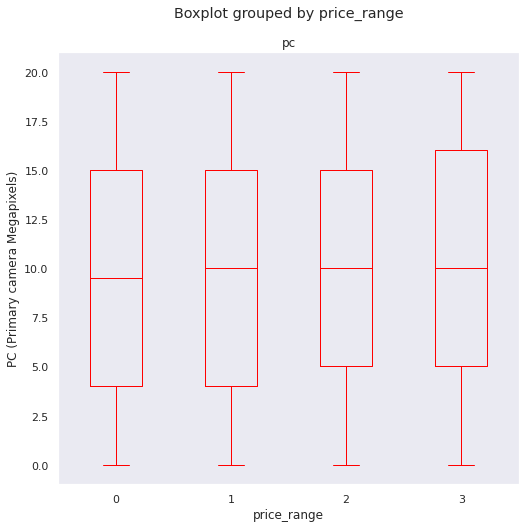

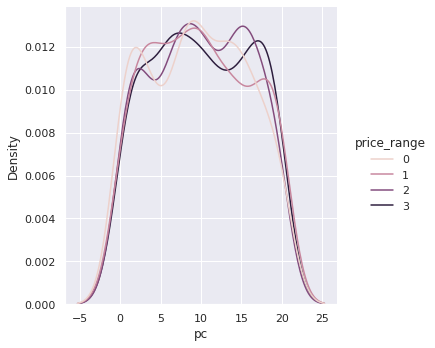

In [31]:
#FC (front camera megapixels)

sns.set_style("darkgrid")
MPR_Dataset.boxplot(by ='price_range', column =['fc'], grid = False,color='red'),
plt.ylabel("FC (front camera megapixels)")

sns.displot(data=MPR_Dataset, x="fc", hue="price_range", kind="kde")


#PC (Primary camera Megapixels)
sns.set_style("darkgrid")
MPR_Dataset.boxplot(by ='price_range', column =['pc'], grid = False,color='red'),
plt.ylabel("PC (Primary camera Megapixels)")

sns.displot(data=MPR_Dataset, x="pc", hue="price_range", kind="kde")


FC (front camera megapixels) and PC (Primary camera Megapixels) features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions

**Screen Height and Screen Width**

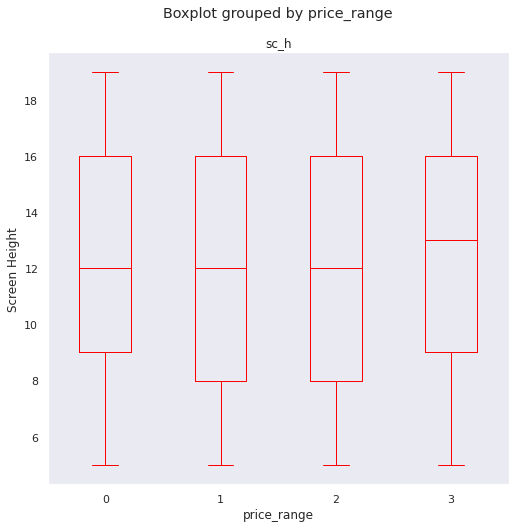

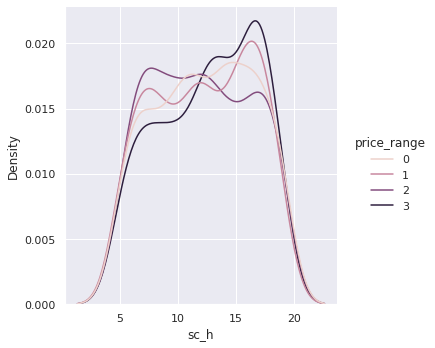

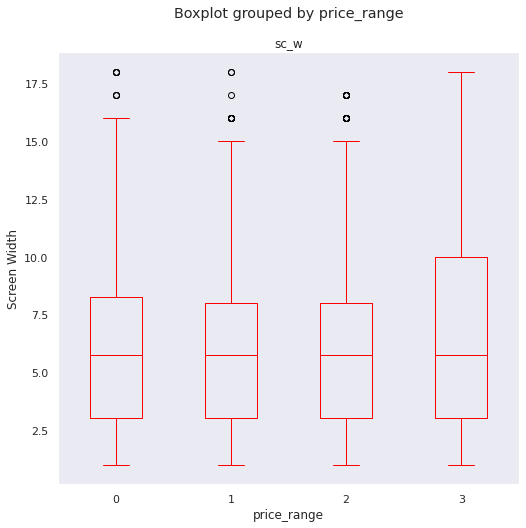

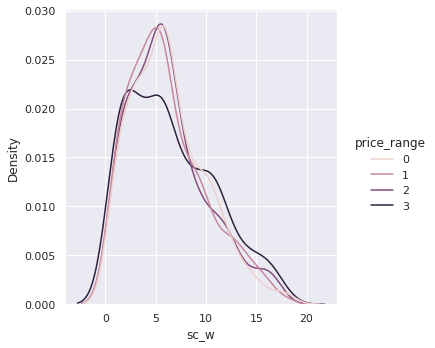

In [32]:
#Screen Height

sns.set_style("darkgrid")
MPR_Dataset.boxplot(by ='price_range', column =['sc_h'], grid = False,color='red'),
plt.ylabel("Screen Height")

sns.displot(data=MPR_Dataset, x="sc_h", hue="price_range", kind="kde")


#Screen Width
sns.set_style("darkgrid")
MPR_Dataset.boxplot(by ='price_range', column =['sc_w'], grid = False,color='red'),
plt.ylabel("Screen Width")

sns.displot(data=MPR_Dataset, x="sc_w", hue="price_range", kind="kde")

Screen Height fetures are not affected in price range.so it may not be helpful in making predictions.

But , Screen Width are showing a little variation along the target categories, which is a good sign for prediction.

**Mobile Weight**

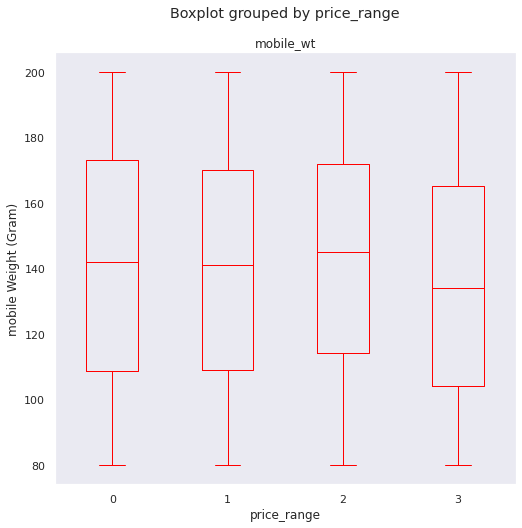

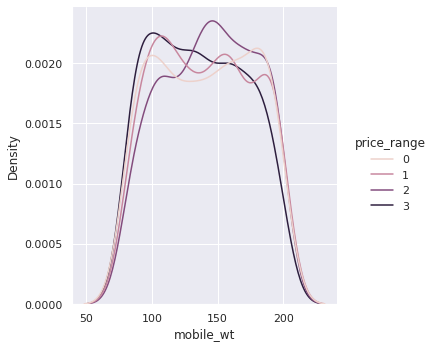

In [33]:
#mobile Weight
sns.set_style("darkgrid")
MPR_Dataset.boxplot(by ='price_range', column =['mobile_wt'], grid = False,color='red'),
plt.ylabel("mobile Weight (Gram)")

sns.displot(data=MPR_Dataset, x="mobile_wt", hue="price_range", kind="kde")

we can see that ,this boxplot costly phones are lighter weight

**Feature_creation:**The pixel dimensions may be determined by multiplying both the width and the height by the Dots Per Inch.

pixel= pixel_Height*pixel_width

In [34]:
MPR_Dataset['pixels'] = MPR_Dataset['px_height']*MPR_Dataset['px_width']

In [35]:

MPR_Dataset['pixels'].head()

0      15120.0
1    1799140.0
2    2167308.0
3    2171776.0
4    1464096.0
Name: pixels, dtype: float64

**Unwanted features are Drop in dataset**

In [36]:
MPR_Dataset.drop(['px_height', 'px_width','blue'], axis = 1, inplace = True)

In [37]:
MPR_Dataset.columns

Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range',
       'pixels'],
      dtype='object')

**Defining depend and independent features**


*   So x is depend features and y is independent features.



In [38]:
x = MPR_Dataset.drop(['price_range'], axis = 1)
y = MPR_Dataset['price_range']

In [39]:
x.columns

Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'pixels'],
      dtype='object')

In [40]:
x.shape
     

(2000, 18)

In [41]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [42]:
y.shape


(2000,)

**Scaling values**

Feature scaling is a method used to normalize the range of independent variables or features of data.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [44]:
x_scaled

array([[0.22778891, 0.68      , 0.        , ..., 0.        , 1.        ,
        0.00365318],
       [0.34736139, 0.        , 1.        , ..., 1.        , 0.        ,
        0.46281548],
       [0.04141617, 0.        , 1.        , ..., 1.        , 0.        ,
        0.55757275],
       ...,
       [0.94188377, 0.16      , 1.        , ..., 1.        , 0.        ,
        0.36435304],
       [0.6753507 , 0.16      , 0.        , ..., 1.        , 1.        ,
        0.05770195],
       [0.00601202, 0.6       , 1.        , ..., 1.        , 1.        ,
        0.09349304]])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.30, random_state = 143)

In [46]:
X_train.shape

(1400, 18)

In [47]:
X_test.shape

(600, 18)

In [48]:
y_train.shape

(1400,)

In [49]:
y_test.shape

(600,)

**supervised machine learning algorithms - classification**

**1. Logistic Regression**

In [50]:
#import and Applying logistic regression model.
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)

LogisticRegression()

In [51]:
# Prediction
y_pred_test = LR_Model.predict(X_test)
y_pred_train = LR_Model.predict(X_train)
     

In [52]:
# Evaluation metrics for test

from sklearn.metrics import classification_report
#classification_report :
#                         It is a performance evaluation metric in machine learning which is used to show the precision, recall, F1 Score, and support score of your trained classification model.

print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))
     

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       141
           1       0.86      0.85      0.86       153
           2       0.79      0.85      0.82       143
           3       0.94      0.90      0.92       163

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.89      0.88      0.88       600




**Model Evaluation**

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses. Model evaluation is important to assess the efficacy of a model during initial research phases, and it also plays a role in model monitoring.

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
CF_matrix = confusion_matrix(y_test, y_pred_test)

print(CF_matrix)
     


[[132   7   0   0]
 [  9 130  12   0]
 [  0  16 121  16]
 [  0   0  10 147]]


In [54]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       375
           1       0.86      0.89      0.88       338
           2       0.83      0.89      0.86       326
           3       0.96      0.91      0.94       361

    accuracy                           0.91      1400
   macro avg       0.91      0.91      0.91      1400
weighted avg       0.91      0.91      0.91      1400



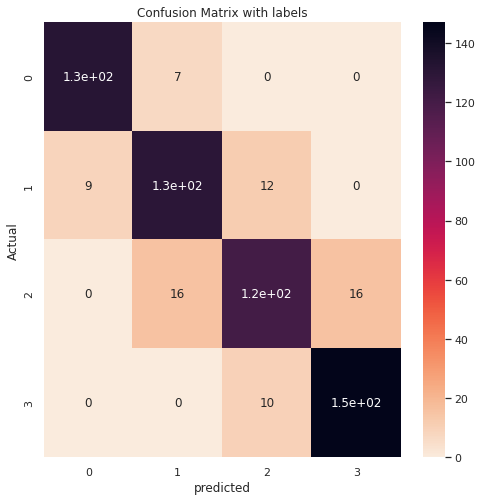

In [55]:
Mat_X = sns.heatmap(CF_matrix, annot=True, cmap='rocket_r')

Mat_X .set_title('Confusion Matrix with labels');
Mat_X .set_xlabel('predicted')
Mat_X .set_ylabel('Actual');
Mat_X .xaxis.set_ticklabels([0,1,2,3])
Mat_X .yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

**2. Random Forest**

In [56]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=450)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=450)

In [58]:
y_pred1 =RFC.predict(X_test)
test_score= accuracy_score(y_test, y_pred1)
test_score
     

0.88

In [59]:

y_pred_train = RFC.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score
     

1.0

In [60]:
print('Classification report for Random Forest (Test set)= ')
print(classification_report(y_test, y_pred1))

Classification report for Random Forest (Test set)= 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       139
           1       0.82      0.85      0.83       151
           2       0.86      0.82      0.84       153
           3       0.94      0.93      0.93       157

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



[[129  10   0   0]
 [ 14 128   9   0]
 [  0  18 125  10]
 [  0   0  11 146]]


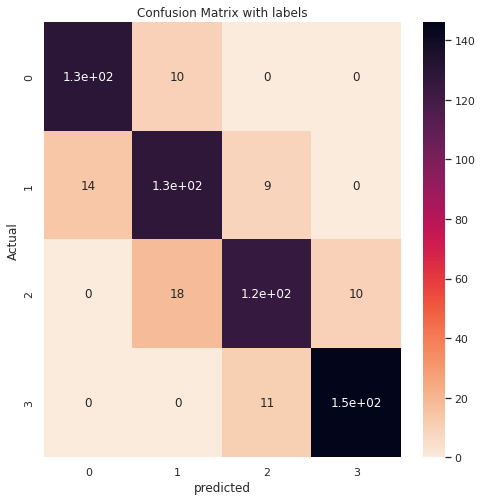

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
CF_matrix = confusion_matrix(y_test, y_pred1)

print(CF_matrix)
Mat_X = sns.heatmap(CF_matrix, annot=True, cmap='rocket_r')

Mat_X .set_title('Confusion Matrix with labels');
Mat_X .set_xlabel('predicted')
Mat_X .set_ylabel('Actual');
Mat_X .xaxis.set_ticklabels([0,1,2,3])
Mat_X .yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [62]:
from sklearn.metrics import classification_report
print('Classification report for Random Forest (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Random Forest (Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       361
           1       1.00      1.00      1.00       349
           2       1.00      1.00      1.00       347
           3       1.00      1.00      1.00       343

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



In [63]:
feature_importance = pd.DataFrame({'Feature':x.columns,'Score':RFC.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance

,Feature,Score
0,ram,0.491702
1,battery_power,0.078595
2,pixels,0.075185
3,mobile_wt,0.043465
4,int_memory,0.039688
5,talk_time,0.032129
6,pc,0.031952
7,sc_w,0.031672
8,clock_speed,0.030403
9,sc_h,0.029713


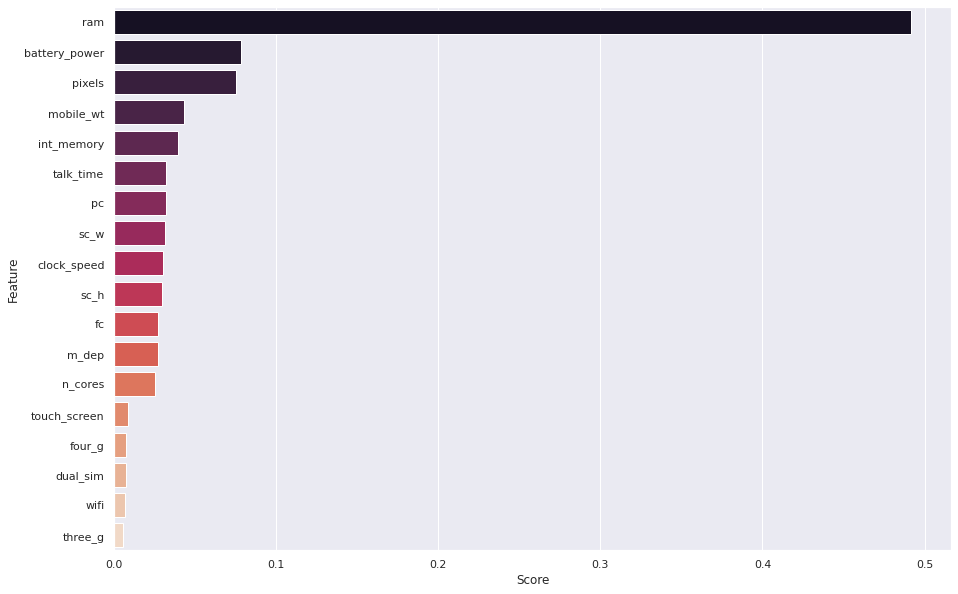

In [64]:
fig, Fe_I = plt.subplots(figsize=(15,10))
Fe_I = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'],palette="rocket",capsize=10)
plt.show()

**Hyperparameter tuning for Random Forest**

In [65]:
from sklearn.model_selection import GridSearchCV
HTRF = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
HRF = RandomForestClassifier()
CLSR = GridSearchCV(HRF, HTRF, scoring='accuracy', cv=3)
CLSR.fit(x, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
CLSR.best_params_

{'max_depth': 10,
 'max_features': 4,
 'max_leaf_nodes': 40,
 'min_samples_split': 6,
 'n_estimators': 200}

In [66]:
CLSR.best_estimator_

RandomForestClassifier(max_depth=30, max_leaf_nodes=40, min_samples_split=6,
                       n_estimators=200)

In [67]:
CLSR.best_score_

0.8594989292140717

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=143)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [69]:
y_pred2 = clsr.predict(X_test)
accuracy_score(y_test, y_pred2)

0.8533333333333334

In [70]:
print('Classification report for Hyperparameter tuning for Random Forest (Test set)= ')
print(classification_report(y_test, y_pred2))

Classification report for Hyperparameter tuning for Random Forest (Test set)= 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       139
           1       0.78      0.76      0.77       151
           2       0.85      0.78      0.81       153
           3       0.93      0.95      0.94       157

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



[[129  10   0   0]
 [ 23 115  13   0]
 [  0  23 119  11]
 [  0   0   8 149]]


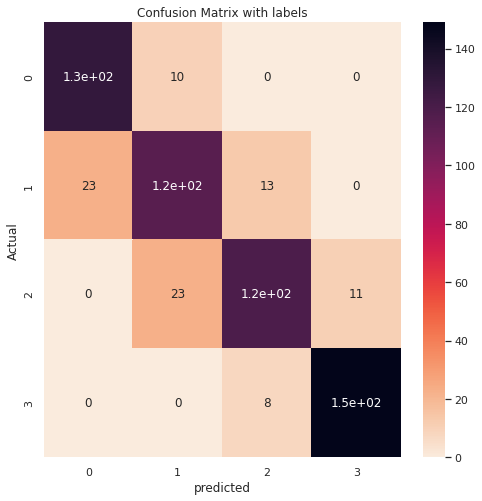

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
CF_matrix = confusion_matrix(y_test, y_pred2)

print(CF_matrix)
Mat_X = sns.heatmap(CF_matrix, annot=True, cmap='rocket_r')

Mat_X .set_title('Confusion Matrix with labels');
Mat_X .set_xlabel('predicted')
Mat_X .set_ylabel('Actual');
Mat_X .xaxis.set_ticklabels([0,1,2,3])
Mat_X .yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()
     

In [72]:
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)

0.9478571428571428

In [73]:
print('Classification report for Hyperparameter tuning for Random Forest (Train set)= ')
print(classification_report(y_train, y_pred))

Classification report for Hyperparameter tuning for Random Forest (Train set)= 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       361
           1       0.93      0.90      0.91       349
           2       0.96      0.92      0.94       347
           3       0.97      0.99      0.98       343

    accuracy                           0.95      1400
   macro avg       0.95      0.95      0.95      1400
weighted avg       0.95      0.95      0.95      1400



**Feature Importance**

In [74]:

feature_importance = pd.DataFrame({'Feature':x.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance

,Feature,Score
0,ram,0.692697
1,battery_power,0.067836
2,pixels,0.067067
3,mobile_wt,0.023399
4,int_memory,0.020961
5,pc,0.016651
6,sc_w,0.016159
7,talk_time,0.016096
8,sc_h,0.014246
9,fc,0.014183


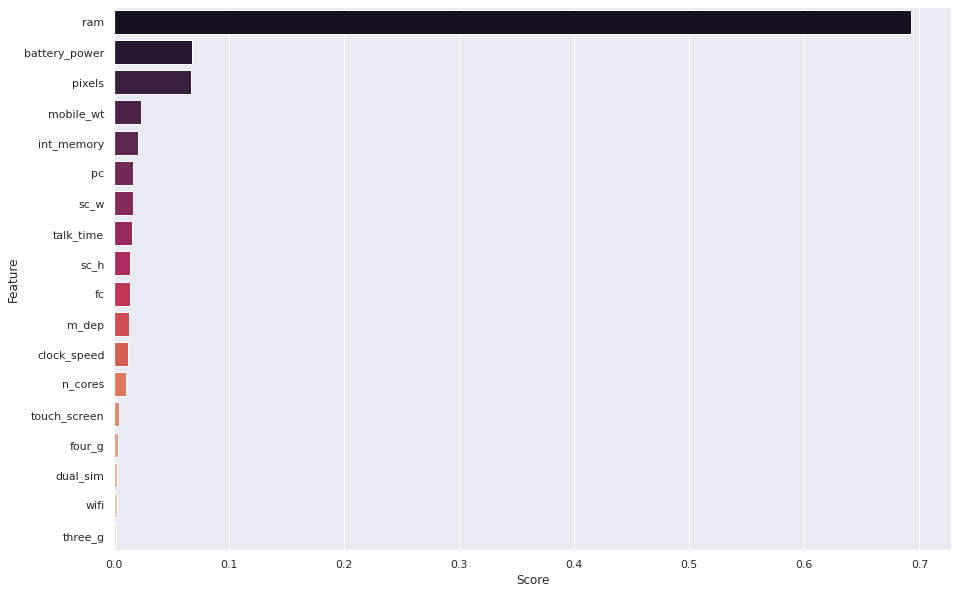

In [75]:
fig, Fe_I = plt.subplots(figsize=(15,10))
Fe_I = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'],palette="rocket",capsize=10)
plt.show()

**3.Decision tree**

In [76]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)
     

DecisionTreeClassifier(max_depth=5)

In [77]:
y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

In [78]:
print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       139
           1       0.85      0.78      0.81       166
           2       0.75      0.82      0.78       140
           3       0.90      0.91      0.90       155

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



**Cross validation**

In [79]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.746 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.811 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.782 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.793 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.761 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [80]:
y_pred_test = grid.predict(X_test)
y_pres_train = grid.predict(X_train)

**Evaluation metrics for train**

In [81]:
print('Classification Report for Decision Tree (train set)= ')
print(classification_report(y_test, y_pred_test))

Classification Report for Decision Tree (train set)= 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       139
           1       0.78      0.88      0.83       151
           2       0.81      0.75      0.78       153
           3       0.90      0.88      0.89       157

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



[[123  16   0   0]
 [ 10 133   8   0]
 [  0  22 115  16]
 [  0   0  19 138]]


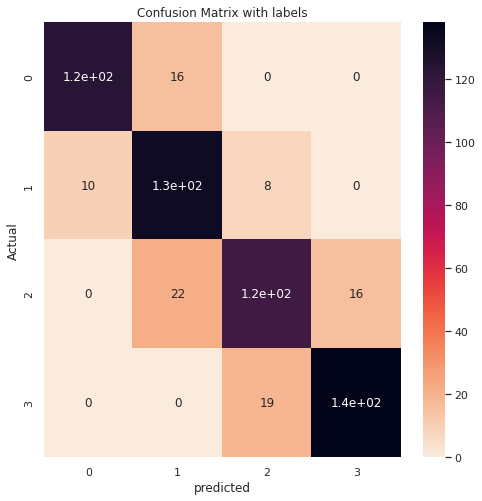

In [82]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
CF_matrix = confusion_matrix(y_test, y_pred_test)

print(CF_matrix)
Mat_X = sns.heatmap(CF_matrix, annot=True, cmap='rocket_r')

Mat_X .set_title('Confusion Matrix with labels');
Mat_X .set_xlabel('predicted')
Mat_X .set_ylabel('Actual');
Mat_X .xaxis.set_ticklabels([0,1,2,3])
Mat_X .yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

**Evaluation metrics for train**

In [83]:
print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       361
           1       0.86      0.88      0.87       349
           2       0.84      0.82      0.83       347
           3       0.93      0.92      0.92       343

    accuracy                           0.90      1400
   macro avg       0.90      0.90      0.90      1400
weighted avg       0.90      0.90      0.90      1400



**4. Support Vector Machine**

In [84]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [85]:
y_pred_test = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

In [86]:
print('Classification report for Support Vector Machine (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Support Vector Machine (Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       137
           1       0.85      0.81      0.83       160
           2       0.80      0.85      0.83       145
           3       0.94      0.93      0.93       158

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



[[127  12   0   0]
 [ 10 129  12   0]
 [  0  19 123  11]
 [  0   0  10 147]]


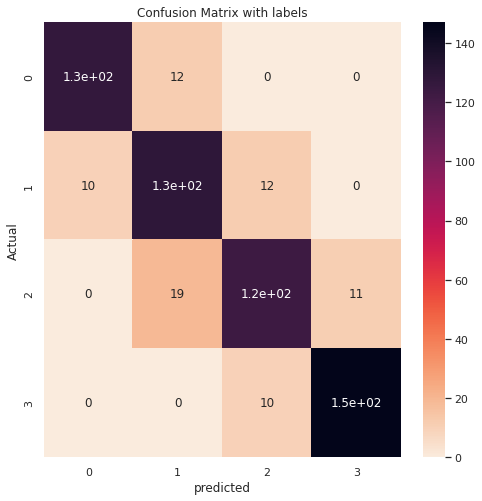

In [87]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
CF_matrix = confusion_matrix(y_test, y_pred_test)

print(CF_matrix)
Mat_X = sns.heatmap(CF_matrix, annot=True, cmap='rocket_r')

Mat_X .set_title('Confusion Matrix with labels');
Mat_X .set_xlabel('predicted')
Mat_X .set_ylabel('Actual');
Mat_X .xaxis.set_ticklabels([0,1,2,3])
Mat_X .yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [88]:
print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       361
           1       0.97      0.98      0.97       349
           2       0.97      0.97      0.97       347
           3       0.99      0.98      0.99       343

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400



**Conclusion**

From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar
.
half the devices have Bluetooth, and half don’t
 
there is a gradual increase in battery as the price range increases


*Ram has continuous increase with price range while moving from Low cost to Very high cost*


costly phones are lighter

RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.

form all the above experiments we can conclude that logistic regression and, Hyperparameter tuning for Random Forest we got the best results




**Thank You**